# Compare support vector machines to a 3 layer neural networks with Titanic dataset

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
os.getcwd()

'C:\\Users\\VADNALA PRASHANTH\\Downloads\\AITS'

## importing train and test data

In [4]:
train= pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.shape

(418, 11)

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [13]:
test['Survived'] = np.nan

In [14]:
print("Total Number of missing vales:", train.isnull().sum().sum())

Total Number of missing vales: 866


In [15]:
male_passengers = train.loc[train.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 577


In [16]:
male_passengers_test = test.loc[test.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers_test)))

Number of male passengers : 266


In [17]:
male_passengers_first_class = train.loc[((train.Sex == 'male') & (train.Pclass == 1)),:]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 122


In [18]:
train.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [21]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292
Survived,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [23]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [24]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


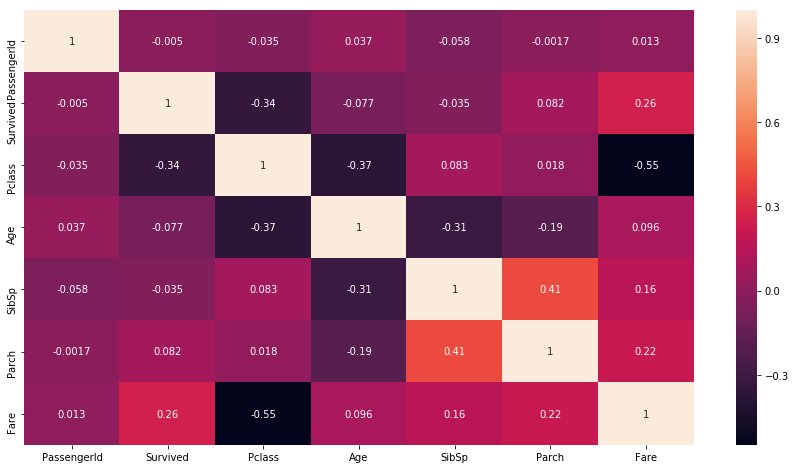

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True)

In [26]:
train.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [27]:
print(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


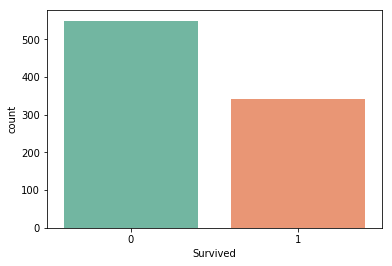

In [28]:
sns.countplot(x='Survived', data=train, palette='Set2')
plt.show()

In [29]:
train.groupby(["Embarked"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


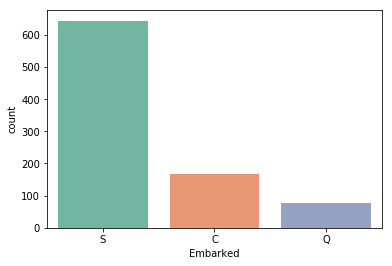

In [30]:
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

In [31]:
train.Pclass.value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

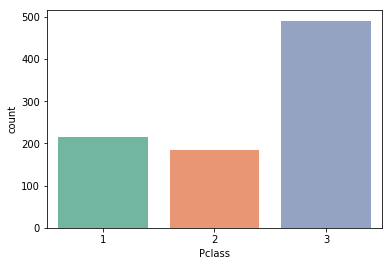

In [32]:
sns.countplot(x='Pclass', data=train, palette='Set2')
plt.show()

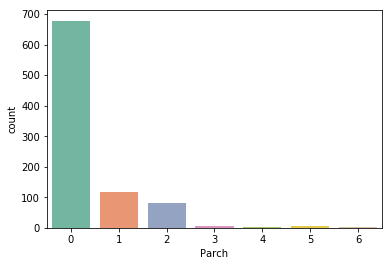

In [33]:
sns.countplot(x='Parch', data=train, palette='Set2')
plt.show()

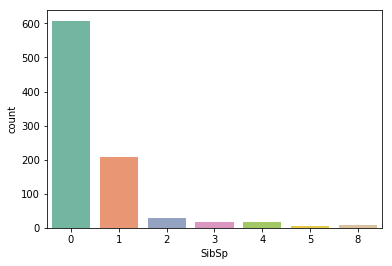

In [34]:
sns.countplot(x='SibSp', data=train, palette='Set2')
plt.show()

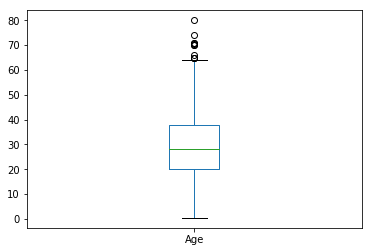

In [35]:
train.Age.plot(kind='box',)

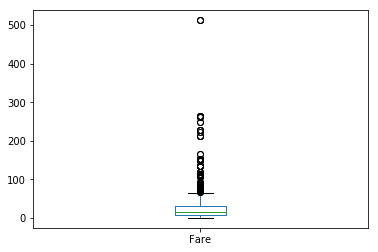

In [36]:
train.Fare.plot(kind='box',)

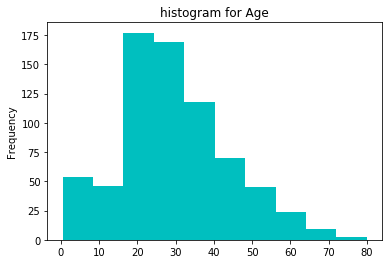

In [37]:
train.Age.plot(kind='hist', title='histogram for Age', color='c');

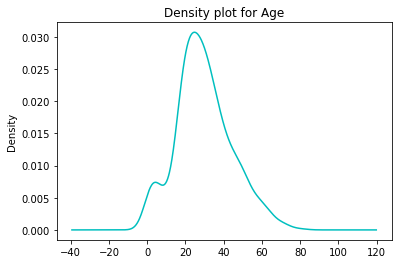

In [38]:
train.Age.plot(kind='kde', title='Density plot for Age', color='c');

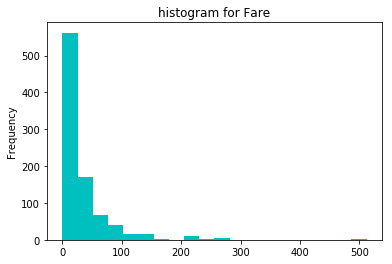

In [39]:
train.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

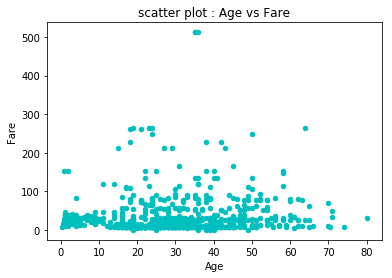

In [40]:
train.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

In [41]:
pd.crosstab(train.Sex, train.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


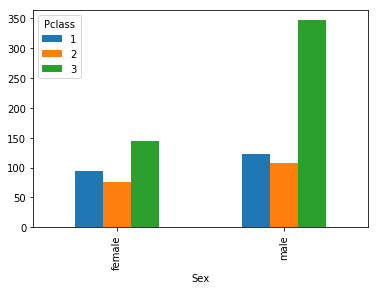

In [42]:
pd.crosstab(train.Sex, train.Pclass).plot(kind='bar');

In [43]:
train.loc[train.Cabin == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [44]:
train.loc[train.Cabin == 'T', 'Cabin'] = np.NaN

In [45]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [46]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
train['Deck'] = train['Cabin'].map(lambda x : get_deck(x))

In [47]:
train.Deck.value_counts()

Z    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [48]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
test['Deck'] = test['Cabin'].map(lambda x : get_deck(x))

In [49]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [50]:
train.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [51]:
test.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona'],
      dtype=object)

In [52]:
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [53]:
train['Title'] =  train.Name.map(lambda x : GetTitle(x))

In [54]:
test['Title'] =  test.Name.map(lambda x : GetTitle(x))

In [55]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,Mrs


In [56]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
pd.crosstab(train.Survived, train.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [58]:
train.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [59]:
test.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [60]:
train.Embarked.fillna('C', inplace=True)

In [61]:
test.Embarked.fillna('C', inplace=True)

In [63]:
train.loc[train.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,A,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Z,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Z,Mr
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,A,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Z,Mr


In [64]:
test.loc[test.Age > 70]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Deck,Title
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S,NaN,C,Mrs


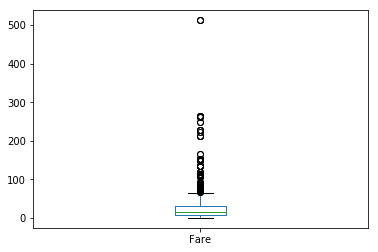

In [65]:
train.Fare.plot(kind='box');

In [66]:
train.loc[train.Fare ==train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Z,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,B,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,B,Mr


In [67]:
test.loc[test.Fare ==test.Fare.max()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Deck,Title
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,NaN,B,Mrs


In [68]:
LogFare = np.log(train.Fare + 1.0)

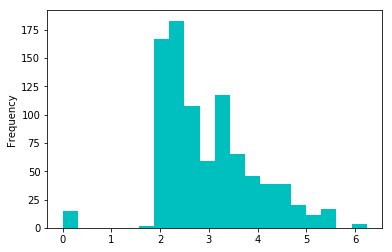

In [69]:
LogFare.plot(kind='hist', color='c', bins=20);

In [70]:
pd.qcut(train.Fare, 4).head()

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [71]:
pd.qcut(train.Fare, 4, labels=['very_low','low','high','very_high'])

0       very_low
1      very_high
2            low
3      very_high
4            low
5            low
6      very_high
7           high
8            low
9           high
10          high
11          high
12           low
13     very_high
14      very_low
15          high
16          high
17           low
18          high
19      very_low
20          high
21           low
22           low
23     very_high
24          high
25     very_high
26      very_low
27     very_high
28      very_low
29      very_low
         ...    
861          low
862         high
863    very_high
864          low
865          low
866          low
867    very_high
868          low
869          low
870     very_low
871    very_high
872     very_low
873          low
874         high
875     very_low
876          low
877     very_low
878     very_low
879    very_high
880         high
881     very_low
882          low
883          low
884     very_low
885         high
886          low
887         high
888         hi

In [72]:
pd.qcut(test.Fare, 4, labels=['very_low','low','high','very_high'])

0       very_low
1       very_low
2            low
3            low
4            low
5            low
6       very_low
7           high
8       very_low
9           high
10      very_low
11          high
12     very_high
13          high
14     very_high
15          high
16           low
17      very_low
18           low
19      very_low
20     very_high
21      very_low
22     very_high
23     very_high
24     very_high
25          high
26     very_high
27      very_low
28          high
29          high
         ...    
388     very_low
389         high
390    very_high
391    very_high
392         high
393          low
394         high
395    very_high
396     very_low
397    very_high
398     very_low
399     very_low
400    very_high
401         high
402    very_high
403    very_high
404         high
405          low
406          low
407    very_high
408     very_low
409          low
410     very_low
411    very_high
412     very_low
413          low
414    very_high
415     very_l

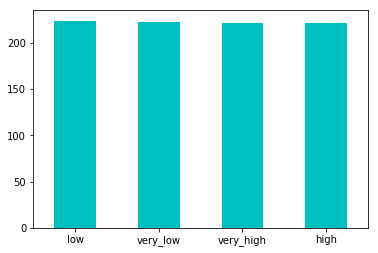

In [73]:
pd.qcut(train.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

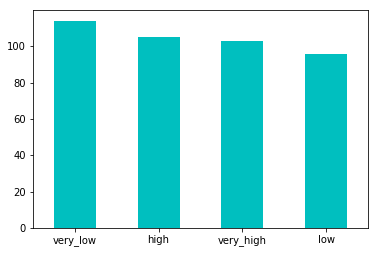

In [74]:
pd.qcut(test.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [75]:
train['Fare_Bin'] = pd.qcut(train.Fare, 4, labels=['very_low','low','high','very_high'])

In [76]:
test['Fare_Bin'] = pd.qcut(test.Fare, 4, labels=['very_low','low','high','very_high'])

In [77]:
train.Age.fillna(train.Age.median(), inplace=True)
test.Age.fillna(test.Age.median(), inplace=True)

In [78]:
train['AgeState'] = np.where(train['Age'] >= 18, 'Adult','Child')

In [79]:
test['AgeState'] = np.where(test['Age'] >= 18, 'Adult','Child')

In [80]:
train['AgeState'].value_counts()

Adult    778
Child    113
Name: AgeState, dtype: int64

In [81]:
train['IsMother'] = np.where(((train.Sex == 'female') & (train.Parch > 0) & (train.Age > 18) & (train.Title != 'Miss')), 1, 0)

In [82]:
test['IsMother'] = np.where(((test.Sex == 'female') & (test.Parch > 0) & (test.Age > 18) & (test.Title != 'Miss')), 1, 0)

In [83]:
train['FamilySize'] = train.Parch + train.SibSp + 1

In [84]:
test['FamilySize'] = test.Parch + test.SibSp + 1

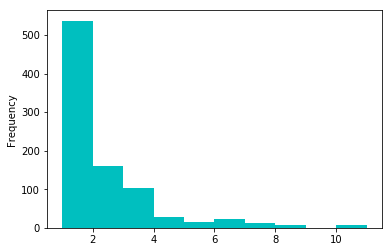

In [85]:
train['FamilySize'].plot(kind='hist', color='c');

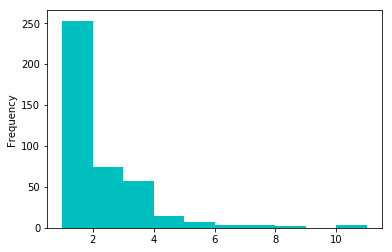

In [86]:
test['FamilySize'].plot(kind='hist', color='c');

In [87]:
train.loc[train.FamilySize == train.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
159,"Sage, Master. Thomas Henry",0,11,CA. 2343
180,"Sage, Miss. Constance Gladys",0,11,CA. 2343
201,"Sage, Mr. Frederick",0,11,CA. 2343
324,"Sage, Mr. George John Jr",0,11,CA. 2343
792,"Sage, Miss. Stella Anna",0,11,CA. 2343
846,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
863,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343


In [88]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Deck           False
Title          False
Fare_Bin       False
AgeState       False
IsMother       False
FamilySize     False
dtype: bool

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Fare_Bin,AgeState,IsMother,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,Mr,very_low,Adult,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,very_high,Adult,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,Miss,low,Adult,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,very_high,Adult,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,Mr,low,Adult,0,1


In [90]:
train.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Deck,Title,Fare_Bin,AgeState,IsMother,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,Z,Mr,very_low,Adult,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,Z,Mrs,very_low,Adult,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,Z,Mr,low,Adult,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,Z,Mr,low,Adult,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,Z,Mrs,low,Adult,1,3


In [92]:
test.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

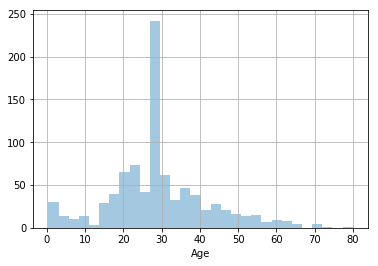

In [93]:
sns.distplot(train['Age'],kde = False)
plt.grid(True)
plt.show()

C:\Users\VADNALA PRASHANTH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\VADNALA PRASHANTH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


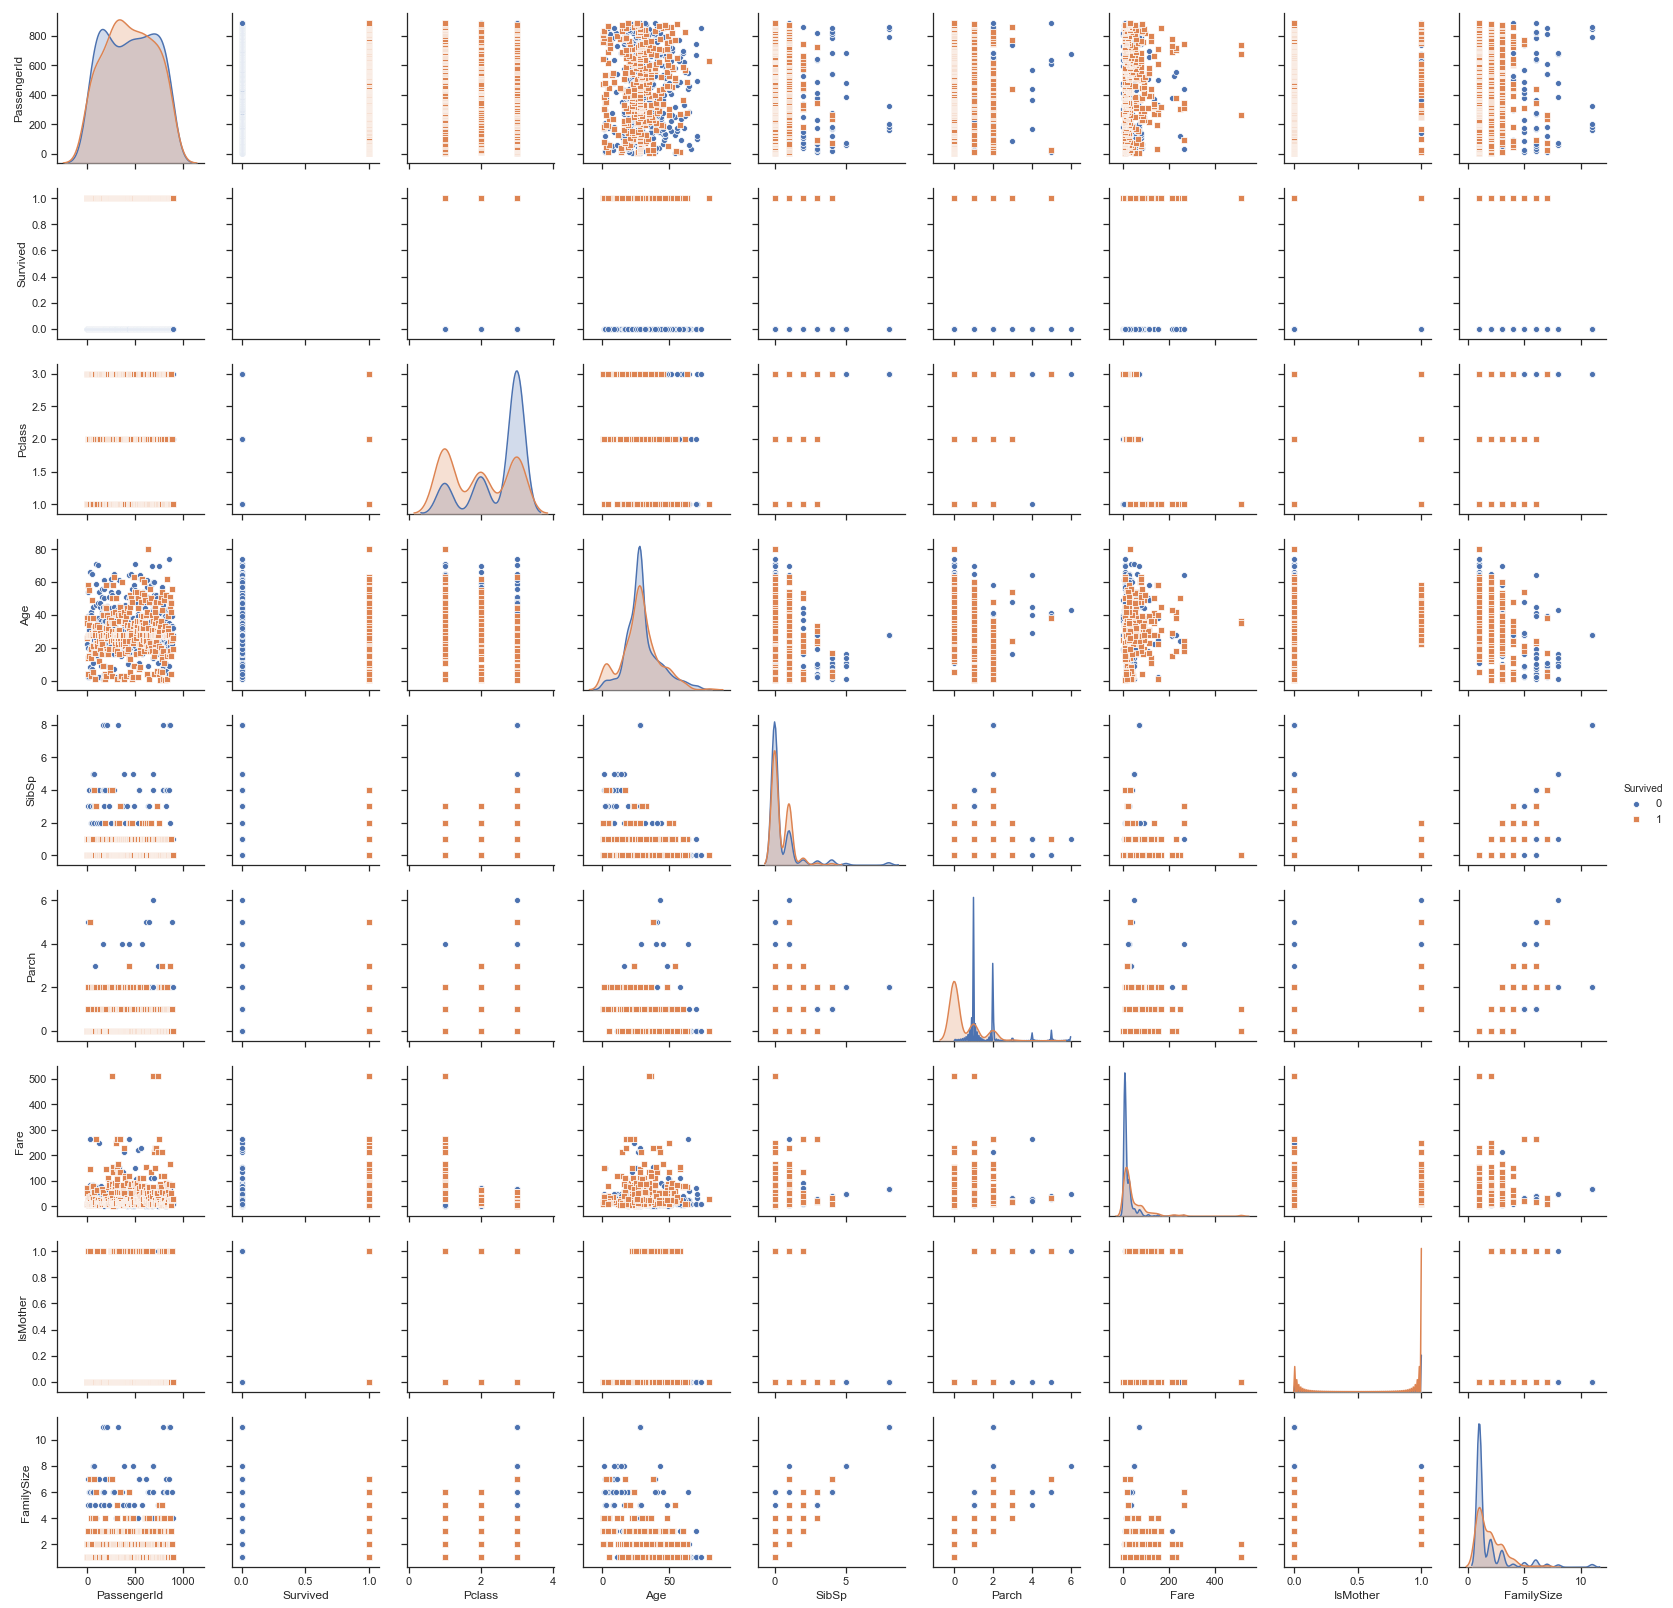

In [94]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train, hue="Survived" ,markers=["o", "s"])   
plt.show()

In [95]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Fare_Bin,AgeState,IsMother,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,Z,Mr,very_low,Adult,0,2
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs,very_high,Adult,0,2
2,3,1,3,female,26.0,0,0,7.9250,S,Z,Miss,low,Adult,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,C,Mrs,very_high,Adult,0,2
4,5,0,3,male,35.0,0,0,8.0500,S,Z,Mr,low,Adult,0,1


In [96]:
s = pd.get_dummies(train['Sex'],prefix='Sex',drop_first=True)
train= pd.concat([train,s],axis=1)

In [97]:
se = pd.get_dummies(test['Sex'],prefix='Sex',drop_first=True)
test= pd.concat([test,se],axis=1)

In [98]:
e = pd.get_dummies(train['Embarked'],prefix='Embarked',drop_first=True)
train= pd.concat([train,e],axis=1)

In [99]:
ee = pd.get_dummies(test['Embarked'],prefix='Embarked',drop_first=True)
test= pd.concat([test,ee],axis=1)

In [100]:
d = pd.get_dummies(train['Deck'],prefix='Deck',drop_first=True)
train= pd.concat([train,d],axis=1)

In [101]:
de = pd.get_dummies(test['Deck'],prefix='Deck',drop_first=True)
test= pd.concat([test,de],axis=1)

In [102]:
t = pd.get_dummies(train['Title'],prefix='Title',drop_first=True)
train= pd.concat([train,t],axis=1)

In [103]:
te = pd.get_dummies(test['Title'],prefix='Title',drop_first=True)
test= pd.concat([test,te],axis=1)

In [104]:
a = pd.get_dummies(train['AgeState'],prefix='AgeState',drop_first=True)
train= pd.concat([train,a],axis=1)

In [105]:
ae = pd.get_dummies(test['AgeState'],prefix='AgeState',drop_first=True)
test= pd.concat([test,ae],axis=1)

In [106]:
f = pd.get_dummies(train['Fare_Bin'],prefix='Fare_Bin',drop_first=True)
train= pd.concat([train,f],axis=1)

In [107]:
fe = pd.get_dummies(test['Fare_Bin'],prefix='Fare_Bin',drop_first=True)
test= pd.concat([test,fe],axis=1)

In [108]:
train.drop(['Sex','Deck','AgeState','Fare_Bin','Title','Embarked','SibSp','Parch'], axis = 1, inplace = True)

In [109]:
test.drop(['Sex','Deck','AgeState','Fare_Bin','Title','Embarked','SibSp','Parch'], axis = 1, inplace = True)

In [110]:
train.shape,test.shape

((891, 27), (418, 27))

In [111]:
Y= train.pop("Survived")

In [112]:
y=test.pop("Survived")

In [113]:
train.head()

,PassengerId,Pclass,Age,Fare,IsMother,FamilySize,Sex_male,Embarked_Q,Embarked_S,Deck_B,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,AgeState_Child,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high
0,1,3,22.0,7.2500,0,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,3,26.0,7.9250,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,4,1,35.0,53.1000,0,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,3,35.0,8.0500,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [115]:
test.head()

,PassengerId,Pclass,Age,Fare,IsMother,FamilySize,Sex_male,Embarked_Q,Embarked_S,Deck_B,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,AgeState_Child,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high
0,892,3,34.5,7.8292,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,893,3,47.0,7.0000,0,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,894,2,62.0,9.6875,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,895,3,27.0,8.6625,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,896,3,22.0,12.2875,1,3,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [116]:
X=train.iloc[:,0:26]

In [117]:
X_test=test.iloc[:,0:26]

In [119]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer_test = RobustScaler().fit(X_test)

In [120]:
X=transformer.transform(X)
X_test=transformer_test.transform(X_test)

In [121]:
X.shape,Y.shape,X_test.shape,y.shape

((891, 26), (891,), (418, 26), (418,))

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((712, 26), (179, 26), (712,), (179,))

In [124]:
from sklearn.svm import SVC  
from sklearn import metrics

# cross validation

In [125]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)

In [126]:
train_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
val_scores = cross_val_score(clf, X_val, y_val, scoring='accuracy', cv=5)
print("Train Fold AUC Scores: ", train_scores)
print("Train CV AUC Score: ", train_scores.mean())
print("\nval Fold AUC Scores: ", val_scores)
print("val CV AUC Score: ", val_scores.mean())

Train Fold AUC Scores:  [0.79020979 0.83216783 0.8041958  0.79577465 0.89361702]
Train CV AUC Score:  0.8231930191474692

val Fold AUC Scores:  [0.88888889 0.58333333 0.86111111 0.75       0.77142857]
val CV AUC Score:  0.770952380952381


# hyperparameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV  

In [128]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4,'scale'],
                     'kernel':['linear','poly','rbf','sigmoid']}]

In [129]:
clf = GridSearchCV(SVC(),tuned_parameters,n_jobs =-1, cv=10, scoring='accuracy', return_train_score=True)

In [130]:
clf.fit(X_train, y_train)

C:\Users\VADNALA PRASHANTH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4, 'scale'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [131]:
clf.cv_results_

{'mean_fit_time': array([1.91293955e-02, 3.06163788e-02, 3.45677614e-02, 3.66237640e-02,
        2.03872681e-02, 5.44980526e-02, 3.49014044e-02, 4.34856176e-02,
        1.94933653e-02, 1.24774623e-01, 3.66911888e-02, 3.74275446e-02,
        1.81297541e-02, 1.91555905e-01, 3.90182972e-02, 3.62388849e-02,
        1.60027742e-02, 2.33083606e-01, 4.18255091e-02, 3.26089382e-02,
        1.95427656e-02, 2.69133091e-02, 2.95977831e-02, 3.77506495e-02,
        2.38853931e-02, 6.29189968e-02, 3.42088223e-02, 3.20660591e-02,
        1.51209831e-02, 1.43453550e-01, 3.41341496e-02, 3.60503912e-02,
        1.93357468e-02, 2.36632872e-01, 3.64110470e-02, 3.29980612e-02,
        2.13639975e-02, 4.70403051e-01, 3.76731396e-02, 3.56155157e-02,
        1.91121578e-02, 1.02946708e+00, 6.82585955e-02, 3.93712997e-02,
        1.81199312e-02, 2.48346806e-02, 2.63788462e-02, 2.51619577e-02,
        4.24648046e-02, 1.37605524e-01, 3.18052530e-02, 3.32358837e-02,
        3.82346153e-02, 2.85981297e-01, 4.38855

In [132]:
clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [133]:
best_grid = clf.best_estimator_
best_grid.score(X_val, y_val)

0.8212290502793296

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [135]:
confusion_matrix(y_val, clf.best_estimator_.predict(X_val))

array([[96, 14],
       [18, 51]], dtype=int64)

In [136]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))
print ("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

Train - Accuracy : 0.8398876404494382
Train - Confusion matrix : [[396  43]
 [ 71 202]]
Train - classification report :               precision    recall  f1-score   support

           0       0.85      0.90      0.87       439
           1       0.82      0.74      0.78       273

   micro avg       0.84      0.84      0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [137]:
print ("val - Accuracy :", metrics.accuracy_score(y_val, clf.predict(X_val)))
print ("val - classification report :", metrics.classification_report(y_val, clf.predict(X_val)))

val - Accuracy : 0.8212290502793296
val - classification report :               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [138]:
y_pred = clf.predict(X_val)

In [139]:
count_misclassified = (y_val != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 32


In [140]:
def plot_roc_curve(y_val, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

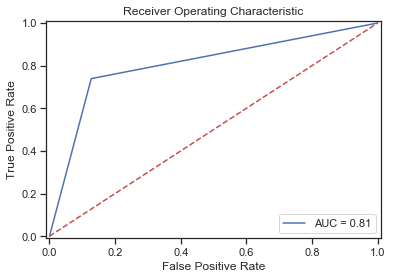

In [141]:
plot_roc_curve(y_val, clf.best_estimator_.predict(X_val))

In [142]:
y_pred_t = clf.predict(X_test)

In [ ]:
# 0.784

# 3-layer neural network

In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
parameters = [{'activation':['identity','logistic','tanh','relu'],'solver':['lbfgs','sgd','adam'],
'learning_rate' : ['constant','invscaling','adaptive'],'max_iter': [50],
'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15),'random_state':[0]}]

In [151]:
clfm = GridSearchCV(MLPClassifier(),parameters,n_jobs =-1, cv=10, scoring='accuracy', return_train_score=True )

In [152]:
clfm.fit(X_train, y_train) 

C:\Users\VADNALA PRASHANTH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [50], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'hidden_layer_sizes': array([10, 11, 12, 13, 14]), 'random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [153]:
clfm.cv_results_

{'mean_fit_time': array([0.06811295, 0.17822423, 0.20800807, ..., 0.0756557 , 0.27681205,
        0.35768778]),
 'std_fit_time': array([0.01949453, 0.02622381, 0.03974836, ..., 0.0112284 , 0.06525475,
        0.07872759]),
 'mean_score_time': array([0.00231457, 0.00080538, 0.00110714, ..., 0.00121386, 0.00131326,
        0.00101309]),
 'std_score_time': array([0.00298292, 0.00241613, 0.00239936, ..., 0.00088477, 0.0023406 ,
        0.00243719]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', ..., 'relu',
                    'relu', 'relu'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, ..., 1e-09, 1e-09, 1e-09],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[10, 10, 10, ..., 14, 14, 14],
              mask=[False, Fa

In [154]:
clfm.best_params_

{'activation': 'identity',
 'alpha': 0.01,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'max_iter': 50,
 'random_state': 0,
 'solver': 'lbfgs'}

In [155]:
best_grid = clfm.best_estimator_
best_grid.score(X_val, y_val)

0.8435754189944135

In [156]:
predMLP=clfm.predict(X_val)
accuracy = accuracy_score(y_val,predMLP)
print(accuracy)

0.8435754189944135


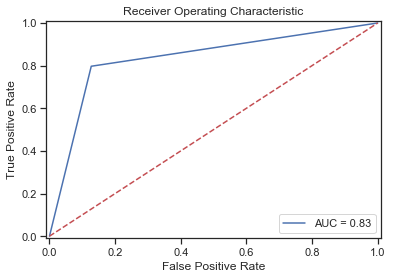

In [157]:
plot_roc_curve(y_val, clfm.predict(X_val))

In [158]:
y_pred_m = clfm.predict(X_test)

In [ ]:
#0.77

In [143]:
sub=pd.read_csv('gender_submission.csv')

In [144]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [145]:
sub.shape

(418, 2)

In [146]:
l=test.PassengerId

In [159]:
submission = pd.DataFrame({ "PassengerId":l ,"Survived":y_pred_m})

In [160]:
submission.to_csv("sample_submission2.csv",index=False)

# For svm

##  training data gives      :          82%
## testing data gives         :          78%


# For MLP neural network 

## training data gives        :        84%                                                  
## testing data gives          :        77%
 
## By comparing   svm vs neural network  for this dataset SVM gives  best results